In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


<ipython-input-1-a49d86cdeb10>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df=pd.read_csv('/content/drive/MyDrive/대외활동/BDA/5주차/Sleep_Efficiency.csv')

In [11]:
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [12]:
df.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration',"Sleep efficiency":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
                     "Alcohol consumption":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency":"Exercise_frequency"}, inplace = True)

In [13]:
df

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


- y값 수치 range

In [14]:
max(df.Sleep_efficiency)

0.99

In [15]:
min(df.Sleep_efficiency)

0.5

# Feature_Selection
- 피처를 선정
- 1. 단순하게 우리가 알고 있는 지표 상관계수를 통해서 피처를 선정해 보자!
- 2. KNN 알고리즘을 이용해서 새로운 변수를 통해 어느정도 성능 커버가 가능한지 확인해 보자!

<Axes: xlabel='Age', ylabel='Density'>

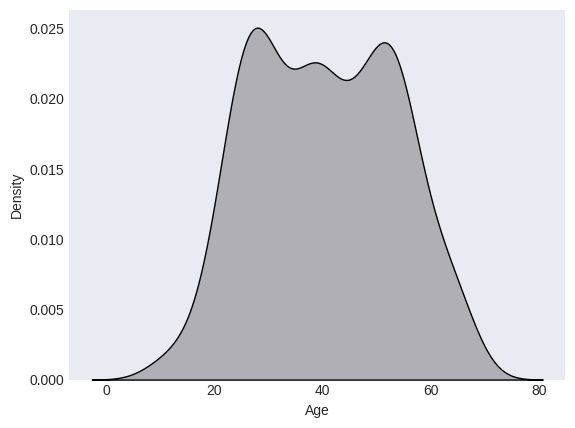

In [16]:
##간단한 시각화
##나이에 대한 시각화
import seaborn as sns
sns.kdeplot(data =df , x='Age', color='black', fill=True)

<Axes: xlabel='Alcohol_consumption', ylabel='Sleep_efficiency'>

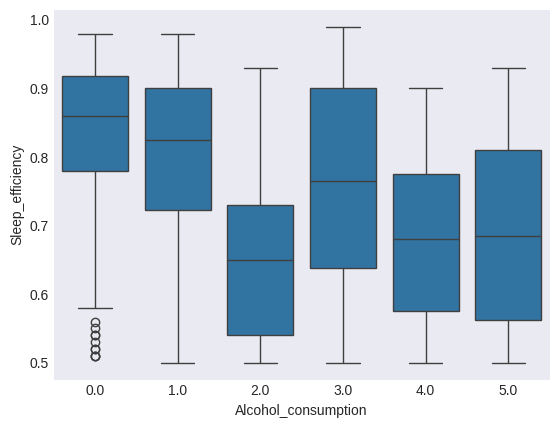

In [17]:
# Alcohol_consumption 컬럼과 다른 피처들의 관계를 좀 살펴보자!
sns.boxplot(data = df, x='Alcohol_consumption', y='Sleep_efficiency')

<Axes: xlabel='Smoking_status', ylabel='Sleep_efficiency'>

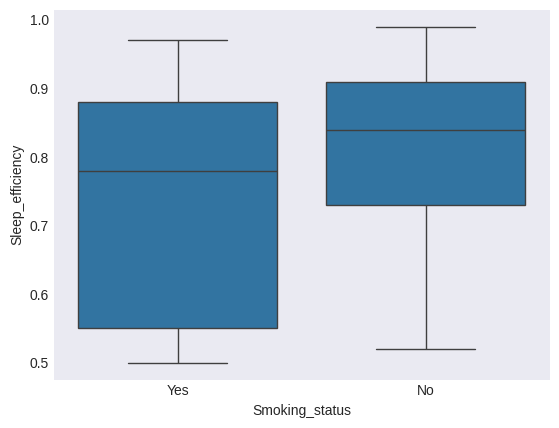

In [18]:
# Smoking_status 컬럼과 다른 피처들의 관계를 좀 살펴보자!
sns.boxplot(data = df, x='Smoking_status', y='Sleep_efficiency')

<Axes: xlabel='Exercise_frequency', ylabel='Sleep_efficiency'>

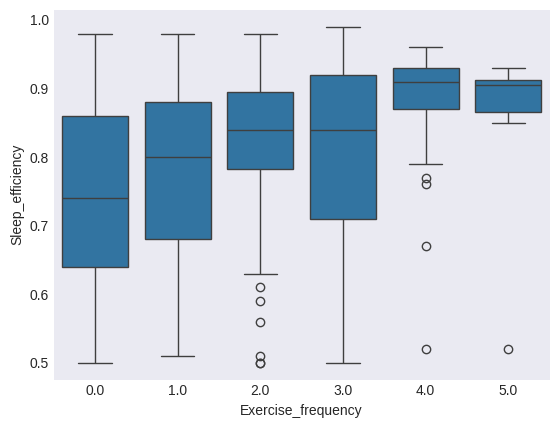

In [19]:
# Sleep_efficiency 컬럼과 다른 피처들의 관계를 좀 살펴보자!

sns.boxplot(data = df, x='Exercise_frequency', y='Sleep_efficiency')

<Axes: xlabel='REM_sleep_percentage', ylabel='Sleep_efficiency'>

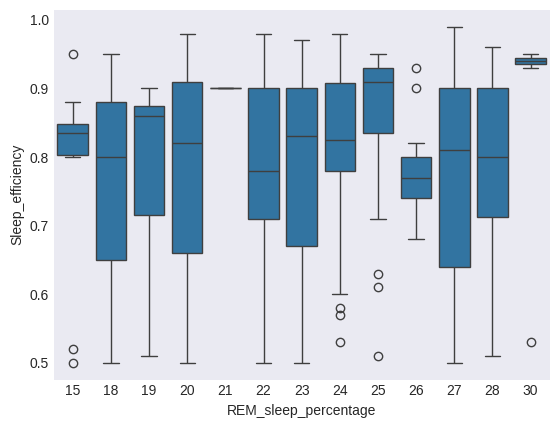

In [20]:
# 수면의 관계에서 어떤 식으로 보여지는지? REM_sleep_percentage
# Sleep_efficiency 컬럼과 다른 피처들의 관계를 좀 살펴보자!

sns.boxplot(data = df, x='REM_sleep_percentage', y='Sleep_efficiency')

<Axes: xlabel='Deep_sleep_percentage', ylabel='Sleep_efficiency'>

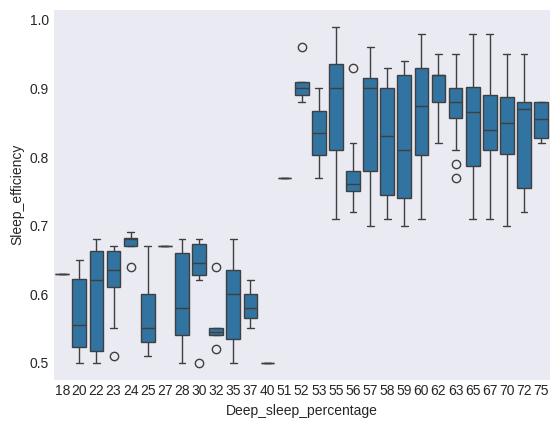

In [21]:
sns.boxplot(data = df, x='Deep_sleep_percentage', y='Sleep_efficiency')

<Axes: xlabel='Awakenings', ylabel='Sleep_efficiency'>

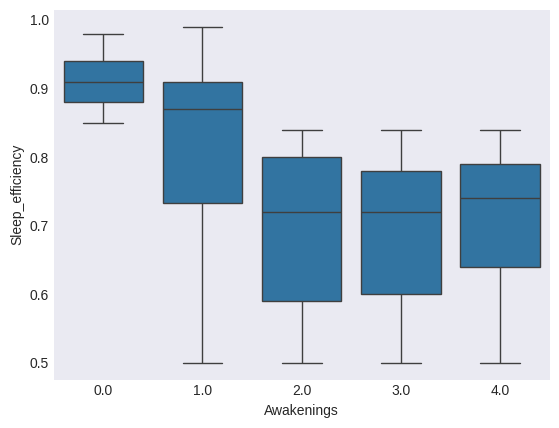

In [22]:
sns.boxplot(data = df, x='Awakenings', y='Sleep_efficiency')

<Axes: xlabel='Sleep_efficiency', ylabel='Density'>

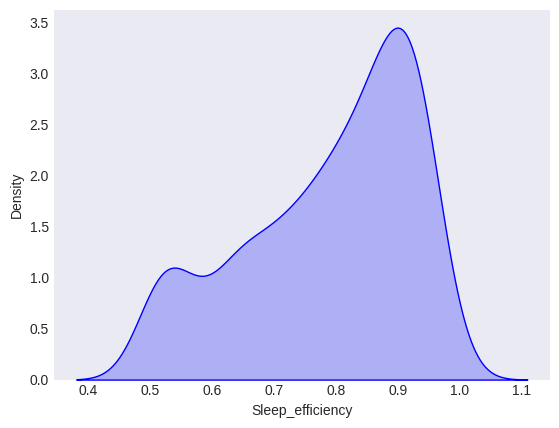

In [23]:
#Y 값의 분포는 어떻게 보이는가?
sns.kdeplot(data =df , x='Sleep_efficiency', color='blue', fill=True)

In [24]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup_time', 'Sleep_duration',
       'Sleep_efficiency', 'REM_sleep_percentage', 'Deep_sleep_percentage',
       'Light_sleep_percentage', 'Awakenings', 'Caffeine_consumption',
       'Alcohol_consumption', 'Smoking_status', 'Exercise_frequency'],
      dtype='object')

In [25]:
df_sp = df[['Sleep_duration','Sleep_efficiency','REM_sleep_percentage','Deep_sleep_percentage','Light_sleep_percentage','Awakenings']]

In [26]:
df_sp

,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings
0,6.0,0.88,18,70,12,0.0
1,7.0,0.66,19,28,53,3.0
2,8.0,0.89,20,70,10,1.0
3,6.0,0.51,23,25,52,3.0
4,8.0,0.76,27,55,18,3.0
...,...,...,...,...,...,...
447,7.5,0.91,22,57,21,0.0
448,6.0,0.74,28,57,15,4.0
449,8.5,0.55,20,32,48,1.0
450,7.0,0.76,18,72,10,3.0


In [27]:
corr_matrix = df_sp.corr().round(2)

<Axes: >

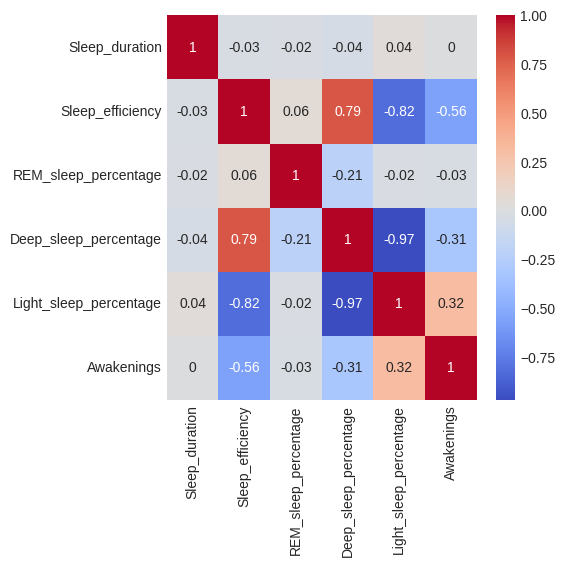

In [28]:
#시각화

plt.figure(figsize=(5,5))
sns.heatmap(data= corr_matrix, annot=True, cmap='coolwarm')

In [29]:
##상관계수로만 봤을 때 수치적으로 낮은 피처를 제외해도 ( 상대적인 수치, 0.5 미만의 수치 ) 성능이 변하는지?
df_sp= df_sp.fillna(1.0) # Awakeinings 가장 빈도가 높은 1로 댗디
df_sp.isna().sum()

Sleep_duration            0
Sleep_efficiency          0
REM_sleep_percentage      0
Deep_sleep_percentage     0
Light_sleep_percentage    0
Awakenings                0
dtype: int64

In [30]:
df_sp= df_sp.fillna(1.0)

In [31]:
X = df_sp.drop('Sleep_efficiency', axis=1)
y = df['Sleep_efficiency']

In [32]:
## 베이스라인 모델 학습
## 간단한 회귀분석

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [33]:
# 간단한 회귀모델 진행

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
#예측값
y_pred = model.predict(X_test)

#Mse

mse = mean_squared_error(y_test, y_pred)
print('모든 피처를 다 사용했을 때 mse:',mse)

모든 피처를 다 사용했을 때 mse: 0.004544475165516406


## 상관계수 수치가 낮은 피처들을 제외했을 때 MSE 변화

In [35]:
# 상관관계 낮은 피처 제외: REM 피처 제외
X = df_sp.drop(['Sleep_efficiency','REM_sleep_percentage'], axis=1)
y = df['Sleep_efficiency']

In [36]:
#REM 제외한 상태
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [37]:
# 간단한 회귀모델 진행
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [38]:
#예측값
y_pred1 = model1.predict(X_test)

#Mse
mse1 = mean_squared_error(y_test, y_pred1)
print('REM_sleep_percentage 피처를 제외했을 때 mse:',mse1)

REM_sleep_percentage 피처를 제외했을 때 mse: 0.004544475165516404


- 상관계수 제외한 피처는 조금은 MSE 변화가 있었다.

0.004544475165516406- 0.004544475165516404

- 3개의 피처 제외

In [39]:
#REM, duration 피처 제외
X = df_sp.drop(['Sleep_efficiency','REM_sleep_percentage','Sleep_duration'], axis=1)
y = df['Sleep_efficiency']

In [40]:
#REM, duration 제외 학습
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [41]:
# 간단한 회귀모델 진행
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [42]:
#예측값
y_pred2 = model2.predict(X_test)

#Mse

mse2 = mean_squared_error(y_test, y_pred2)
print('REM_sleep_percentage 피처를 제외했을 때 mse:',mse2)

REM_sleep_percentage 피처를 제외했을 때 mse: 0.0045422302154008625


##  KMeans 기반으로 피처를 만들고, 실제 해당 피처를 통해 어느정도 커버되는지 확인하기

In [43]:
from sklearn.cluster import KMeans

X2 = df_sp.drop(['Sleep_efficiency','REM_sleep_percentage','Sleep_duration'], axis=1)

In [44]:
X2 #해당 값으로 kmeans를 진행하기

,Deep_sleep_percentage,Light_sleep_percentage,Awakenings
0,70,12,0.0
1,28,53,3.0
2,70,10,1.0
3,25,52,3.0
4,55,18,3.0
...,...,...,...
447,57,21,0.0
448,57,15,4.0
449,32,48,1.0
450,72,10,3.0


In [45]:
#kmeans 클러스터 실행
kmeans = KMeans(n_clusters=5)
X_clustered = kmeans.fit_predict(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
# 피처를 붙여보자!
X_new_featured=np.hstack((X2, X_clustered.reshape(-1,1)))

In [47]:
X_new_featured = pd.DataFrame(X_new_featured)

In [48]:
X_new_featured.rename(columns= {0:'Deep_sleep_percentage',1:'Light_sleep_percentage',2:'Awakenings',3:'clusters'}, inplace=True)

## 1. clusters 만 넣고 진행하기

- 클러스터 값만 가지고 진행하게 되면 완벽히 커버하기는 어렵다.

In [49]:
X3=X_new_featured.drop(['Deep_sleep_percentage','Light_sleep_percentage','Awakenings'],axis=1)
y = df_sp['Sleep_efficiency']

In [50]:
#클러스터 값만 사용
X_train, X_test, y_train, y_test = train_test_split(X3,y, test_size=0.3, random_state=111)

In [51]:
# 간단한 회귀모델 진행
model3 = LinearRegression()
model3.fit(X_train,y_train)

LinearRegression()

In [52]:
#예측값
y_pred3 = model3.predict(X_test)

#Mse

mse3 = mean_squared_error(y_test, y_pred3)
print('Cluster만 피처 사용했을 때 mse:',mse3)

Cluster만 피처 사용했을 때 mse: 0.020254743710300862


## 2. 가장 상관계수가 낮았던 Awakenings 피처만 제외하고 어느정도 커버할까?

In [53]:
# 상관계수 낮은 Awakenings컬럼 제외하기
X4=X_new_featured.drop('Awakenings',axis=1)
y = df_sp['Sleep_efficiency']

In [54]:
X4

,Deep_sleep_percentage,Light_sleep_percentage,clusters
0,70.0,12.0,4.0
1,28.0,53.0,1.0
2,70.0,10.0,4.0
3,25.0,52.0,1.0
4,55.0,18.0,0.0
...,...,...,...
447,57.0,21.0,0.0
448,57.0,15.0,0.0
449,32.0,48.0,3.0
450,72.0,10.0,4.0


In [55]:
#Awakenings값 제외하고 클러스터를 대체 사용
X_train, X_test, y_train, y_test = train_test_split(X4,y, test_size=0.3, random_state=111)

In [56]:
# 간단한 회귀모델 진행
model4 = LinearRegression()
model4.fit(X_train,y_train)

LinearRegression()

In [57]:
#예측값
y_pred4 = model4.predict(X_test)

#Mse

mse4 = mean_squared_error(y_test, y_pred4)
print('Cluster만 피처 사용했을 때 mse:',mse4)

Cluster만 피처 사용했을 때 mse: 0.0058340239556460135


## Kmeans 의 하이퍼파라미터를 조금씩 더 수정해서 진행하면 어떨까?

In [58]:
kmeans_model1 =KMeans(
    init = 'k-means++',
    n_clusters = 3,
    n_init = 10,
    max_iter= 200,
    random_state=111)

In [59]:
kmeans_model1.fit(X2)

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=111)

In [60]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [61]:
elbow_ch =KElbowVisualizer(kmeans_model1)

KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(max_iter=200, n_clusters=10, n_init=10,
                                  random_state=111))

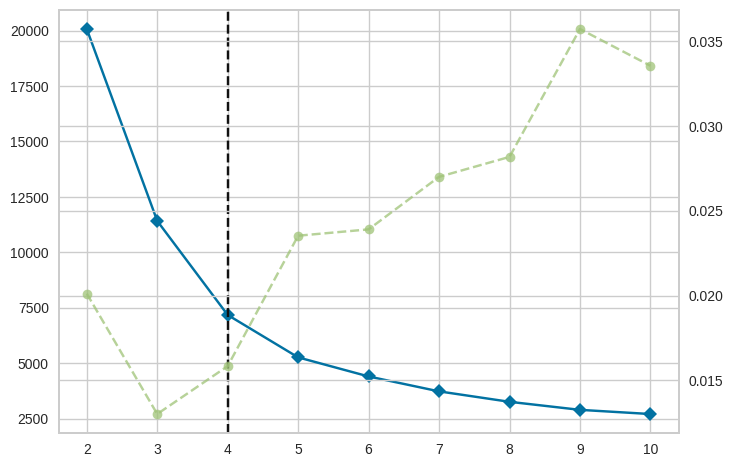

In [62]:
elbow_ch.fit(X2)
#elbow_ch.draw()

IndexError: index 3 is out of bounds for axis 0 with size 3

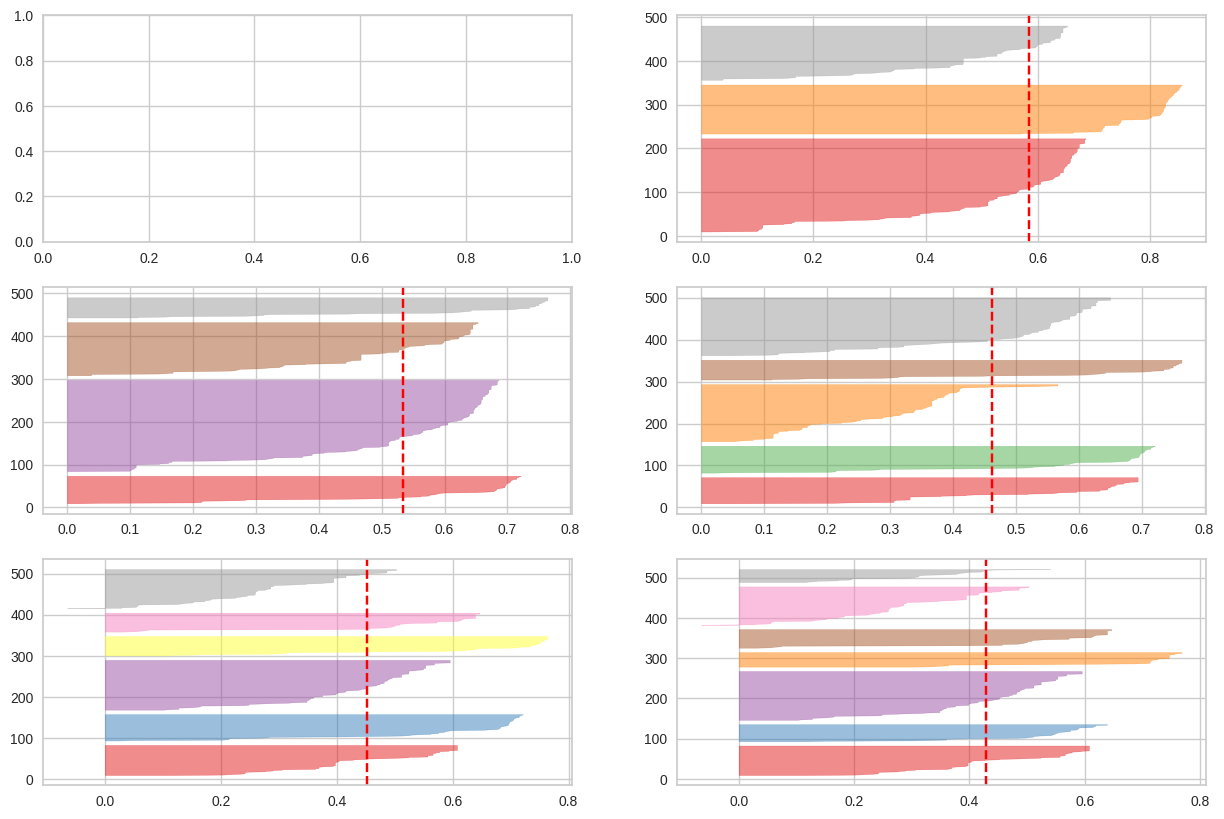

In [63]:
fig, ax = plt.subplots(3,2, figsize=(15,10))

for i in [3,4,5,6,7,9]:
    kmeans_model2 =KMeans(
        init = 'k-means++',
        n_clusters = i,
        n_init = 10,
        max_iter= 200,
        random_state=111)
    q, mod = divmod(i,2)

    #실루엣계수 시각화
    visual = SilhouetteVisualizer(kmeans_model2, color =' yellowbricks',ax= ax[q-1][mod])
    visual.fit(X2)

## 실제 cluster 4( 엘보우, 실루엣을 확인하고 최적의 클러스터를  찾고 )로 하면 성능이 어느정도 더 올라갈까?

In [64]:
#kmeans 클러스터 실행

kmeans1 = KMeans(
        init = 'k-means++',
        n_clusters = 4,
        n_init = 10,
        max_iter= 200,
        random_state=111)
X_clustered1 = kmeans1.fit_predict(X2)

In [65]:
# 피처를 붙여보자!

X_new_featured=np.hstack((X2, X_clustered1.reshape(-1,1)))

In [66]:
X_new_featured = pd.DataFrame(X_new_featured)

In [67]:
X_new_featured.rename(columns= {0:'Deep_sleep_percentage',1:'Light_sleep_percentage',2:'Awakenings',3:'clusters'}, inplace=True)

In [68]:
X_new_featured.clusters.value_counts()

clusters
1.0    214
2.0    125
0.0     65
3.0     48
Name: count, dtype: int64

## 1. 클러스터만 남기고 진행

In [69]:
X4=X_new_featured.drop(['Deep_sleep_percentage','Light_sleep_percentage','Awakenings'],axis=1)
y = df_sp['Sleep_efficiency']

In [70]:
X4

,clusters
0,2.0
1,0.0
2,2.0
3,0.0
4,1.0
...,...
447,1.0
448,1.0
449,3.0
450,2.0


In [71]:
#클러스터 값만 사용
X_train, X_test, y_train, y_test = train_test_split(X4,y, test_size=0.3, random_state=111)

# 간단한 회귀모델 진행

model4 = LinearRegression()
model4.fit(X_train,y_train)


#예측값
y_pred4 = model4.predict(X_test)

#Mse

mse4 = mean_squared_error(y_test, y_pred4)
print('Cluster만 피처 사용했을 때 mse:',mse4)

Cluster만 피처 사용했을 때 mse: 0.02078813657991194


- 0.018948990032615277

## 2. 가장 상관계수가 낮았던 Awakenings 피처만 제외하고 어느정도 커버할까?

In [72]:
X4=X_new_featured.drop('Awakenings',axis=1)
y = df_sp['Sleep_efficiency']

In [73]:
#클러스터 값만 사용
X_train, X_test, y_train, y_test = train_test_split(X4,y, test_size=0.3, random_state=111)

In [74]:
# 간단한 회귀모델 진행

model4 = LinearRegression()
model4.fit(X_train,y_train)


#예측값
y_pred4 = model4.predict(X_test)

#Mse

mse4 = mean_squared_error(y_test, y_pred4)
print('Cluster만 피처 사용했을 때 mse:',mse4)

Cluster만 피처 사용했을 때 mse: 0.006207016915466807
